## Load Data

In [1]:
import pandas as pd
import numpy as np
import re
import datetime
import textstat
import math
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem.snowball import SnowballStemmer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import StratifiedKFold 

In [2]:
df = pd.read_csv('data/neat_data.csv')

In [3]:
df = df.reindex(sorted(df.columns), axis=1)

In [4]:
df.keys()

Index(['AuthorCommitsFile', 'CommittedTwice', 'ReviewedCommitsFile',
       'ReviewedPRs', 'ReviewingTwice', 'TotalAuthoredCommits',
       'TotalReviewedCommits', 'author_file_experience', 'author_responded',
       'change_status', 'comment_time', 'commit_time', 'current_code',
       'dev_commits', 'gratitude', 'is_confirmatory_response', 'is_last_patch',
       'label', 'line_change', 'message', 'num_comments_in_thread',
       'num_participate', 'num_patches', 'num_prev_comment_same_file',
       'num_review_comment', 'patch_id', 'reply', 'rev_commits', 'reviewer_id',
       'senticr_msg', 'senticr_rpl', 'status_num'],
      dtype='object')

## Feature Calculation

Programming keywords list

- https://www.tutorialspoint.com/computer_programming/computer_programming_keywords.htm
- https://github.com/AnanthaRajuCprojects/Reserved-Key-Words-list-of-various-programming-languages
- https://docs.swift.org/swift-book/ReferenceManual/LexicalStructure.html

In [5]:
stop_word_list = ['fifteen',  'own',  'specify',  'inasmuch',  'immediate',  'someday',  'merely',  'behind',  "couldn't",  'did',  'sometime',  'arise',  'recently',  "how's",  'seeming',  'suggest',  'farther',  'yet',  "it'd",  'always',  'different',  'o',  'mostly',  'x',  'opposite',  'etc',  'move',  'whereby',  'successfully',  'okay',  'elsewhere',  "she's",  'nobody',  'two',  "oughtn't",  'which',  'yourselves',  'insofar',  'world',  'previously',  'sub',  'consequently',  'keeps',  'e',  "you'll",  'somebody',  "that's",  "he'll",  'especially',  'looking',  'provides',  'mrs',  'novel',  'secondly',  "that've",  'certainly',  'ex',  'u',  'happens',  'together',  'theyd',  'unless',  'shes',  'arent',  't',  'same',  'miss',  'towards',  'low',  'p',  'owing',  'specified',  'viz',  'taken',  'along',  'everybody',  'the',  'four',  'ca',  'got',  'ord',  'otherwise',  'therere',  'right',  'hundred',  'ltd',  "you'd",  'bottom',  'according',  'is',  'we',  'hence',  'whose',  'section',  'slightly',  'information',  'importance',  'ago',  'thin',  'auth',  'herein',  'amount',  'six',  'appear',  'he',  'much',  's',  'this',  'nine',  'yours',  "won't",  'here',  'those',  'beside',  "i've",  "what've",  'mg',  'necessarily',  'me',  "hadn't",  'call',  'considering',  'minus',  'showns',  "she'll",  "why's",  'hes',  'look',  'are',  'neither',  'fix',  'edu',  "here's",  'howbeit',  "'ll",  'able',  'whither',  'through',  'begin',  'last',  'likewise',  'specifying',  'however',  'youre',  'backwards',  'little',  'wonder',  'normally',  'none',  'page',  'unlike',  'gotten',  'should',  'anyhow',  'know',  'and',  'soon',  'similarly',  'ignored',  'been',  'when',  'inside',  'between',  'aren',  'seeing',  'twenty',  'consider',  'so',  'added',  'hasnt',  'stop',  "didn't",  "mustn't",  'whereafter',  'ref',  'causes',  'widely',  'less',  "we'd",  'neverless',  'besides',  'im',  'getting',  "it's",  'abroad',  'himse”',  'run',  'possible',  'back',  "i'll",  'half',  'end',  'at',  'never',  'sensible',  'throughout',  "a's",  'indicate',  'most',  "where's",  'accordance',  'becomes',  "we've",  'alongside',  'have',  'potentially',  'gives',  'forever',  'please',  'away',  'despite',  'being',  'per',  'make',  'need',  'already',  'mill',  'some',  'new',  'promptly',  'ff',  'c',  'outside',  'obtained',  'inner',  'for',  "shan't",  'entirely',  'kept',  'fify',  'sure',  'home',  'that',  'because',  'id',  'whatever',  'th',  "shouldn't",  'since',  'his',  "who'd",  'regards',  'hereafter',  "ain't",  'showed',  'greetings',  'thence',  'while',  'use',  'whence',  'gone',  're',  'forth',  'let',  'indicated',  'made',  'further',  'better',  'appropriate',  'upon',  'such',  'interest',  'w',  "when's",  'self',  'kg',  'primarily',  'truly',  'once',  "who's",  'latterly',  'placed',  'concerning',  'maybe',  'til',  'ran',  'obtain',  'least',  'everyone',  'rd',  'bill',  'affecting',  'ninety',  'whos',  'also',  'theres',  'don',  'a',  'wish',  'whereas',  'several',  'after',  'above',  'thereof',  "daren't",  'gave',  'million',  'possibly',  "weren't",  'y',  'words',  'whether',  'eight',  'sup',  "'ve",  'empty',  'think',  'de',  'fairly',  'mainly',  'actually',  'resulted',  'three',  'want',  'wherever',  'v',  'what',  'far',  "we're",  'mug',  'largely',  'nevertheless',  'than',  'says',  'thank',  'no-one',  'formerly',  'nowhere',  'no',  'given',  'can',  'detail',  'keys',  'announce',  'like',  'brief',  'come',  'part',  'welcome',  'na',  'by',  'f',  'follows',  'indicates',  'ups',  'ahead',  'appreciate',  'vol',  'regardless',  'another',  'to',  'tell',  'take',  'allows',  'quickly',  'backward',  'looks',  'certain',  'serious',  "doesn't",  'only',  'giving',  'first',  'indeed',  'therefore',  'i',  "there're",  'till',  'refs',  'date',  'about',  'has',  'whod',  'meantime',  'followed',  'seen',  'nor',  'latter',  'course',  "i'd",  'inc',  'various',  "one's",  'system',  'states',  'effect',  'km',  "t's",  'probably',  'perhaps',  'us',  'fill',  'will',  'm',  "she'd",  'toward',  'not',  'itself',  'does',  'changes',  'thou',  'itse”',  'shown',  'ok',  'apart',  'versus',  'herse”',  'begins',  'thirty',  'nos',  'took',  'youd',  'contains',  'might',  "wouldn't",  'saw',  'thats',  'amidst',  'whilst',  'contain',  'except',  'my',  'sincere',  "can't",  'caption',  'comes',  'round',  'dare',  'how',  'noone',  'predominantly',  "hasn't",  'across',  'research',  'against',  'may',  'reasonably',  'anymore',  'described',  "aren't",  'furthermore',  'heres',  'cannot',  'somewhat',  'said',  'forty',  'second',  'seems',  'ever',  'be',  'fifth',  'give',  'biol',  'ts',  "he's",  'invention',  'moreover',  "you're",  'must',  'whim',  'if',  'enough',  'uucp',  'seem',  "they're",  'before',  'z',  'regarding',  'n',  'anyways',  'wed',  'every',  'zero',  'j',  'just',  'downwards',  'needs',  'then',  'say',  'unlikely',  'sometimes',  'went',  'mr',  'particularly',  'later',  'thoroughly',  'makes',  'any',  'again',  "mightn't",  'con',  'alone',  'ed',  'go',  'example',  'put',  'within',  'using',  'accordingly',  'past',  'awfully',  'around',  'it',  'front',  "who'll",  'whoever',  'rather',  'off',  'inward',  'available',  'mine',  'there',  'instead',  'affected',  'usefulness',  'vols',  'doing',  'clearly',  'd',  'hello',  'became',  'index',  'on',  'computer',  'specifically',  'but',  'amongst',  'known',  'theirs',  'qv',  'thanx',  'hi',  'directly',  "needn't",  'briefly',  'hed',  'adj',  'these',  'done',  'eleven',  "they'd",  'beginning',  'unto',  'aside',  'sufficiently',  "it'll",  'amoungst',  'resulting',  'nay',  'from',  'obviously',  'cant',  'thereby',  'onto',  'each',  'hereby',  'would',  'anyone',  'anyway',  'do',  'theyre',  "wasn't",  'hopefully',  "there'll",  'an',  'everything',  'beforehand',  'h',  'significant',  'g',  'neverf',  'act',  'q',  'necessary',  'associated',  'trying',  'very',  'selves',  'things',  'old',  'often',  'anything',  'whomever',  'liked',  'in',  'adopted',  'saying',  'way',  'wheres',  'state',  'keep',  'who',  'all',  'nearly',  'k',  'anywhere',  'him',  'ah',  'relatively',  'whole',  'hither',  'means',  'thing',  'see',  'whichever',  'strongly',  'more',  'amid',  'used',  'useful',  'thereupon',  'going',  'near',  'usually',  'believe',  'undoing',  'under',  'respectively',  "don't",  'pp',  'our',  'ending',  "let's",  'thoughh',  'still',  'allow',  'following',  'hers',  'line',  'substantially',  'thru',  'tried',  'eg',  'due',  'unfortunately',  'whats',  'thereafter',  'currently',  'itd',  'b',  'others',  'her',  'co',  'shall',  'couldnt',  'namely',  'yes',  'lest',  'whom',  'thousand',  'top',  'present',  'or',  'definitely',  'few',  'myself',  'notwithstanding',  'mean',  'former',  'co.',  'et-al',  'affects',  'try',  'ten',  'hid',  'asking',  'thered',  'et',  'too',  'your',  'thick',  'sent',  'although',  'really',  'goes',  'was',  'therein',  'third',  'whenever',  'tip',  'un',  'plus',  'www',  'thereto',  'via',  'else',  'somewhere',  "that'll",  "haven't",  'myse”',  'uses',  'poorly',  'into',  'proud',  'they',  'side',  'knows',  "c'mon",  'com',  'ours',  'among',  'thanks',  "there's",  'quite',  'upwards',  'shed',  'anybody',  'thorough',  'help',  'thus',  'had',  'ourselves',  'exactly',  'somehow',  'important',  'whereupon',  'full',  "he'd",  'seriously',  'yourself',  'its',  'eighty',  'meanwhile',  'results',  'ie',  'even',  'tries',  'apparently',  'related',  'evermore',  'almost',  'sixty',  'well',  'value',  'abst',  'tends',  "you've",  'likely',  'wherein',  'up',  'where',  'beginnings',  'many',  'readily',  'nd',  'get',  'something',  'now',  'find',  "c's",  "what'll",  "what's",  'seven',  'fire',  'name',  "they've",  'somethan',  'provided',  'below',  'why',  'came',  "we'll",  'pages',  'found',  'everywhere',  'one',  "isn't",  'she',  'their',  "there've",  'hereupon',  'willing',  "mayn't",  'am',  'approximately',  'describe',  'r',  'non',  'recent',  'beyond',  'five',  'overall',  'them',  'himself',  'que',  'out',  'lately',  'usefully',  'inc.',  'ones',  'gets',  'sec',  'corresponding',  'best',  'themselves',  'until',  'particular',  'other',  'containing',  'could',  'cry',  'twelve',  'during',  'forward',  "they'll",  'l',  'sorry',  'afterwards',  'both',  'though',  'hardly',  'nothing',  'seemed',  'significantly',  'noted',  'wants',  'over',  "there'd",  'ask',  'fewer',  'herself',  'were',  'cause',  'twice',  'ml',  'lets',  'next',  'taking',  'throug',  'show',  'immediately',  'presumably',  'as',  'someone',  'with',  'without',  'ought',  'similar',  'you',  'of',  'become',  'I',  'oh',  'lower',  'shows',  'underneath',  'having',  "i'm",  'becoming',  'nonetheless',  'vs',  'either',  'down',  'omitted']

In [6]:
c_reserved = ["auto", "else", "long", "switch", "break", "enum", "register", "typedef", "case", "extern", "return", "union", "char", "float", "short", "unsigned", "const", "for", "signed", "void", "continue", "goto", "sizeof", "volatile", "default", "if", "static", "while", "do", "int", "struct", "_Packed", "double"]
cpp_reserved = ["auto", "break", "case", "char", "continue", "default", "do", "double", "else", "entry", "extern", "float", "for", "goto", "if", "int", "long", "register", "return", "short", "sizeof", "static", "struct", "switch", "typedef", "union", "unsigned", "void", "volatile", "while", "asm", "bool", "catch", "class", "const_cast", "delete", "dynamic_cast", "explicit", "false", "friend", "inline", "mutable", "namespace", "new", "operator", "private", "public", "protected", "reinterpret_cast", "static_cast", "template", "this", "throw", "true", "try", "typeid", "typename", "using", "virtual", "wchar_t", "and", "and_eq", "bitand", "bitor", "compl", "not", "not_eq", "or", "or_eq", "xor", "xor_eq", "cin", "cout", "endl", "include", "INT_MIN", "INT_MAX", "iomanip", "iostream", "main", "MAX_RAND", "npos", "NULL", "std", "string"]
java_reserved = ["abstract", "assert", "boolean", "break", "byte", "case", "catch", "char", "class", "const", "continue", "default", "do", "double", "else", "enum", "extends", "final", "finally", "float", "for", "goto", "if", "implements", "import", "instanceof", "int", "interface", "long", "native", "new", "package", "private", "protected", "public", "return", "short", "static", "strictfp", "super", "switch", "synchronized", "this", "throw", "throws", "transient", "try", "void", "volatile", "while"]
python_reserved = ["and", "exec", "not", "assert", "finally", "or", "break", "for", "pass", "class", "from", "print", "continue", "global", "raise", "def", "if", "return", "del", "import", "try", "elif", "in", "while", "else", "is", "with", "except", "lambda", "yield"]
swift_reserved = ["associatedtype", "class", "deinit", "enum", "extension", "fileprivate", "func", "import", "init", "inout", "internal", "let", "open", "operator", "private", "protocol", "public", "rethrows", "static", "struct", "subscript", "typealias", "var", "break", "case", "continue", "default", "defer", "do", "else", "fallthrough", "for", "guard", "if", "in", "repeat", "return", "switch", "where", "while", "as", "Any", "catch", "false", "is", "nil", "super", "self", "Self", "throw", "throws", "true", "try", "#available", "#colorLiteral", "#column", "#else", "#elseif", "#endif", "#error", "#file", "#fileID", "#fileLiteral", "#filePath", "#function", "#if", "#imageLiteral", "#line", "#selector", "#sourceLocation", "#warning", "associativity", "convenience", "dynamic", "didSet", "final", "get", "infix", "indirect", "lazy", "left", "mutating", "none", "nonmutating", "optional", "override", "postfix", "precedence", "prefix", "Protocol", "required", "right", "set", "Type", "unowned", "weak", "willSet"]
others = ["for(", "for (", "if(", "if (", "while(", "while (", "switch(", "switch (", "else if", "else{", "else {", ".c", ".h", ".java", ".py", ".php", ".html", ".css", ".xml", ".tcp", "sqlite3.o", "sqlite.o", "sqlite2.o", ".sh", ".dat", ".josn", "http", "post" "sconscript", "path", "gcov", "add", "null", "flag", "bug", "newline", "memcpy", "boolean", "int", "integer", "float", "double", "char", "void", "class", "struct", "function", "method", "->", "pointer", "return", "stack", "queue", "vector", "array", "variable", "#include", "enum", "#define", "std", "macro", "header", "api", "risk", "cerr", "namespace", "parameter", "append", "prepend", "static" "indent" "loop" "size_t" "%d", "%s", "%f", "%lf", "%zu", "\\n", "print", "cout", "stdlib", "apk", "malloc", "switch", "self.", "==", ">=", "<=", ">", "<", "|", "&", "||", "&&", "--", "++", "**", "^", "~", "()", "{}", "[]", "*", "+", "-", "=", "\n", "\t", "\s",  'while', 'case', 'switch','def', 'abstract','byte','continue','native','private','synchronized', 'if', 'do', 'include', 'each', 'than', 'finally', 'class', 'double', 'float', 'int','else','instanceof', 'long', 'super', 'import', 'short', 'default', 'catch', 'try', 'new', 'final', 'extends', 'implements', 'public', 'protected', 'static', 'this', 'return', 'char', 'const', 'break', 'boolean', 'bool', 'package', 'byte', 'assert', 'raise', 'global', 'with', 'or', 'yield', 'in', 'out', 'except', 'and', 'enum', 'signed', 'void', 'virtual', 'union', 'goto', 'var', 'function', 'require', 'print', 'echo', 'foreach', 'elseif', 'namespace', 'delegate', 'event', 'override', 'struct', 'readonly', 'explicit', 'interface', 'get', 'set','elif','for', 'throw','throws','lambda','endfor','endforeach','endif','endwhile','clone']

all_stop = set(c_reserved+cpp_reserved+java_reserved+swift_reserved+others+stop_word_list)
programming_keywords = set(c_reserved+cpp_reserved+java_reserved+swift_reserved+others) - set(stop_word_list)
print(programming_keywords)

{'<=', 'string', '~', 'defer', 'associatedtype', 'for(', 'sqlite2.o', 'macro', '\\s', '%s', '>', 'transient', '=', '.sh', 'return', 'lambda', 'default', '#selector', 'raise', 'const_cast', 'template', 'assert', '.xml', 'postsconscript', '-', 'virtual', 'delegate', 'short', 'extension', 'false', 'print', 'INT_MIN', 'set', 'goto', 'api', 'convenience', 'add', 'main', '#file', 'yield', 'namespace', 'newline', 'import', 'stdlib', 'xor', 'typedef', '*', 'optional', '.josn', '()', 'postfix', 'or_eq', 'switch (', 'bitor', '\\n', 'Any', 'sqlite3.o', '#define', 'inout', 'byte', 'def', 'Type', 'endwhile', 'NULL', '^', '**', 'implements', 'deinit', 'volatile', 'char', 'dynamic_cast', 'throw', 'switch(', 'protocol', 'function', 'xor_eq', 'cout', 'cin', 'synchronized', '#sourceLocation', 'memcpy', '[]', 'flag', 'unsigned', '--', 'INT_MAX', 'void', 'delete', 'pointer', 'for (', 'else{', '.css', 'infix', 'Protocol', 'iostream', '==', 'final', '<', 'vector', '\t', 'strictfp', '#fileLiteral', '#warning

In [7]:
def stopWordRatio(s):
    tokens = s.split()
    n = 0
    for x in tokens:
        if x in all_stop:
            n+=1
    return n/len(tokens)

In [8]:
def count_words(s):
    return len(s.split())

In [9]:
def programmin_words_count(s):
    count = 0
    lowerCamelCase = r'[a-z]+[A-Z0-9][a-z0-9]+[A-Za-z0-9]*'
    upperCamelCase = r'[A-Z][a-z0-9]*[A-Z0-9][a-z0-9]+[A-Za-z0-9]*'
    snake_case = r'([a-zA-Z]*_[a-zA-Z]+)+'
    methodCalls = r'[\w]+(?=\().+\)'
    splits = s.split()
    for w in splits:
        if re.match(snake_case, w) != None or re.match(methodCalls, w) != None or re.match(lowerCamelCase, w) != None or re.match(upperCamelCase, w) != None or w in programming_keywords:
            count += 1
    return count

In [10]:
def discretize_pd(src_df, tgt_df, column_name, bins, onehot=True):
    desc = pd.qcut(src_df[column_name], bins, labels=False)
    if not onehot or bins<=2:
        tgt_df[column_name] = desc
    else:
        tgt_df[column_name] = (desc==0)*1
        for i in range(1,bins):
            tgt_df[column_name+str(i)] = (desc==i)*1

#discretize_pd(df, data, 'TotalAuthoredCommits', 3, True)

In [11]:
# Binarization using scikit-learn. Not used
def binarize(series):
    binerizer = KBinsDiscretizer(n_bins=2, encode='onehot', strategy='quantile')
    array = np.array(list(series)).reshape(-1,1)
    binerizer.fit(array)
    binarized = binerizer.transform(array)
    bin_array = binarized.toarray()
#     if bin_array.shape[1] == 1:
#         return bin_array.T[0]
#     else:
    return binarized.toarray()[:,0]

In [12]:
def num_of_question(s):
    question_phrase = r'\s[A-Za-z\s]*\?'
    questions = re.findall(question_phrase, s)
    return len(questions)

In [13]:
def num_of_sentences(s):
    sentence = r'([A-Z][^\.!?]*[\.!?])'
    sentences = re.findall(sentence, s)
    return len(sentences) if len(sentences) > 0 else 1

In [14]:
def convert_datetime(s):
    date_splitter = r'[\s : -]'
    l = re.split(date_splitter, s)
    d = datetime.datetime(int(l[0]), int(l[1]), int(l[2]), int(l[3]), int(l[4]), int(l[5]))
    return d

In [15]:
def get_total_seconds(d):
    return d.total_seconds()

In [16]:
def readability_score(s):
    return textstat.flesch_reading_ease(s)

In [17]:
## Vectorization utility functions

def state(c):
    n = ord(c)
    if n>=97 and n<=122: # lower case
        return 1
    elif n>=65 and n<=90: # upper case
        return 2
    elif n>=48 and n<=57: # numbers
        return 3
    elif c.isspace(): # whitespaces
        return 4
    elif c == '.': 
        return 5
    elif n < 128:
        return 6
    else:
        return 7

def space_up(s):
    if s is None or s == "":
        return ""
    new_s = s[0]
    for i in range(1,len(s)):

        prev_state = state(s[i-1])
        curr_state = state(s[i])

        if prev_state == 1 and curr_state not in [1,4]: 
            new_s += " "
        elif prev_state == 2 and curr_state not in [1,2,4]:
            new_s += " "
        elif prev_state == 3 and curr_state not in [3,4]:
            new_s += " "
        elif prev_state == 6 and curr_state not in [6,4]:
            new_s += " "
        elif prev_state == 5 and curr_state != 4:
            new_s += " "
        elif curr_state==7:
            continue

        new_s+=s[i]

    return new_s.lower()


def clean_text(s):
    '''
    Removes all characters other than alphabets
    Splits words with camel case, snake case
    removes stop words, and common programming keywords
    '''
    regex = re.compile('[^a-zA-Z]')
    s = regex.sub(' ', s)
    s = space_up(s)
    s = ' '.join([x for x in s.split() if x not in all_stop])
    return s

def clean_list(my_list):
    return [clean_text(s) for s in my_list]

def stem_tokens(tokens):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize_and_stem(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens)
    return stems

def is_gratitude(text):
    gratitde_list = ["thanks", "thank you", "appreciate", "was helpful"]
    for g in gratitde_list:
        if g in text:
            return 1
    return 0

In [18]:
def get_total_word_count(df):
    return df['message'].apply(count_words)

def get_coding_words_count(df):
    return df['message'].apply(programmin_words_count)

def get_stop_ratio(df):
    return df['message'].apply(stopWordRatio)

def get_num_of_sentences(df):
    return df['message'].apply(num_of_sentences)

def get_num_of_questions(df):
    return df['message'].apply(num_of_question)

def get_all_readability_scores(df):
    readability_list= []
    for message in df['message']:
        try:
            score = readability_score(message)
        except:
            score = 0
        readability_list.append(score)
    return np.array(readability_list)

def get_gratitude(df):
    return df['reply'].apply(is_gratitude)

def get_code_ratio(df):
    return df['programming_words']/df['word_count']

def get_question_ratio(df):
    d1 = get_num_of_questions(df)
    d2 = get_num_of_sentences(df)
    return d1/d2

def get_all_delays(df):
    d1 = df['comment_time'].apply(convert_datetime)
    d2 = df['commit_time'].apply(convert_datetime)
    diff = d1 - d2
    diff = diff.apply(get_total_seconds)
    diff = diff/60
    diff = np.log2(diff)
    diff[np.isnan(diff)] = 0
    return np.rint(diff)

In [19]:
## Similarity Calculation

stemmer = SnowballStemmer("english")

def get_similarity(df):
    training_comments= clean_list(list(df.message)+list(df.current_code))
    # discard stopwords, apply stemming, and discard words present in less than 3 comments
    vectorizer = TfidfVectorizer(tokenizer=tokenize_and_stem, sublinear_tf=True, max_df=0.5,
                                 stop_words=list(all_stop), min_df=3)
    vectors = vectorizer.fit_transform(training_comments).toarray()
    comment_vectors = vectors[:len(df)]
    code_vectors = vectors[len(df):]
    similarities = []
    for i in range(len(df)):
        similarities.append(np.dot(comment_vectors[i], code_vectors[i]))
    return np.array(similarities)

For details about SentiCR, please visit https://github.com/senticr/SentiCR

## Feature Calculation

In [20]:
data = pd.DataFrame()

In [21]:
# Binary features
data['message_sentiment'] = df['senticr_msg'] + 1
data['reply_sentiment'] = df['senticr_rpl'] + 1
data['change_trigger'] = df['change_status']
data['status'] = df['status_num']
data['is_confirmatory_response'] = df['is_confirmatory_response']
data['gratitude'] = df['gratitude']
data['is_last_patch'] = df['is_last_patch']
data['author_responded'] = df['author_responded']
data['label'] = df['label']

# Neumeric Features
data['patch_id'] = df['patch_id']
data['num_patches'] = df['num_patches']
data['line_change'] = df['line_change']
data['num_comments_in_thread'] = df['num_comments_in_thread']
data['num_participate'] = df['num_participate']
data['num_prev_comment_same_file'] = df['num_prev_comment_same_file']
data['rev_commits'] = df['rev_commits']
data['dev_commits'] = df['dev_commits']
data['num_review_comment'] = df['num_review_comment']
data['author_file_experience'] = df['author_file_experience']

## Calculating new features from data
data['readability'] = get_all_readability_scores(df)
data['programming_words'] = get_coding_words_count(df)
data['word_count'] = get_total_word_count(df)
data['question_ratio'] = get_num_of_questions(df)
data['similarity'] = get_similarity(df)
data['review_interval'] = get_all_delays(df)
data['stop_word_ratio'] = get_stop_ratio(df)
data['code_word_ratio'] = get_coding_words_count(df)/get_total_word_count(df)

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['#', '%', "'d", "'m", "'s", '(', ')', '.', '.pi', '[', ']', '_pack', 'abl', 'abov', 'accord', 'actual', 'ad', 'adopt', 'affect', 'afterward', 'ai', 'alon', 'alongsid', 'alreadi', 'alway', 'ani', 'announc', 'anoth', 'anybodi', 'anymor', 'anyon', 'anyth', 'anywher', 'appar', 'appreci', 'appropri', 'approxim', 'aris', 'asid', 'associ', 'associatedtyp', 'avail', 'aw', 'becam', 'becaus', 'becom', 'befor', 'believ', 'besid', 'briefli', 'caus', 'chang', 'clear', 'colorliter', 'column', 'comput', 'concern', 'consequ', 'consid', 'continu', 'conveni', 'correspond', 'cours', 'cri', 'current', 'defin', 'definit', 'deleg', 'delet', 'describ', 'despit', 'didset', 'differ', 'direct', 'doe', 'doubl', 'downward', 'dure', 'dynam', 'eighti', 'els', 'elsewher', 'empti', 'endwhil', '

In [22]:
data = data.reindex(sorted(data.columns), axis=1)

## Correlation elimination

In [23]:
data.corr(method='pearson')

,author_file_experience,author_responded,change_trigger,code_word_ratio,dev_commits,gratitude,is_confirmatory_response,is_last_patch,label,line_change,...,programming_words,question_ratio,readability,reply_sentiment,rev_commits,review_interval,similarity,status,stop_word_ratio,word_count
author_file_experience,1.000000,0.072970,0.031368,-0.024134,-0.080849,0.083186,0.055983,0.028118,0.022155,-0.030421,...,0.043718,-0.009588,0.006777,0.020412,0.103002,0.017618,-0.004331,-0.075564,0.006047,0.037504
author_responded,0.072970,1.000000,0.123774,-0.043459,0.010639,0.269958,0.791638,-0.154399,-0.058850,-0.125480,...,-0.042584,0.076308,0.051382,-0.045729,-0.205808,0.095572,-0.032939,-0.156716,-0.073112,-0.048347
change_trigger,0.031368,0.123774,1.000000,0.034230,-0.197294,0.097135,0.213936,-0.589189,0.021543,-0.992028,...,-0.021731,-0.090996,-0.057899,0.053606,-0.101297,-0.066132,-0.000597,-0.110833,-0.099302,-0.083421
code_word_ratio,-0.024134,-0.043459,0.034230,1.000000,0.074196,-0.146443,-0.044113,-0.031207,0.133075,-0.037069,...,0.489825,-0.039819,-0.492757,0.001549,0.220870,-0.062238,0.232529,0.202949,0.111198,0.009555
dev_commits,-0.080849,0.010639,-0.197294,0.074196,1.000000,-0.244620,-0.033510,0.106657,0.085166,0.199931,...,0.116320,0.096423,-0.056169,-0.058817,0.384971,-0.161630,0.164280,0.256601,0.095271,0.088585
gratitude,0.083186,0.269958,0.097135,-0.146443,-0.244620,1.000000,0.265943,-0.088919,-0.122149,-0.095239,...,-0.094633,0.006775,0.080439,0.002976,-0.299446,0.163650,-0.076191,-0.063916,0.033704,0.089199
is_confirmatory_response,0.055983,0.791638,0.213936,-0.044113,-0.033510,0.265943,1.000000,-0.146056,-0.002608,-0.217305,...,-0.063255,-0.106903,0.023929,0.113646,-0.210669,0.103736,-0.032589,-0.147848,-0.131807,-0.092655
is_last_patch,0.028118,-0.154399,-0.589189,-0.031207,0.106657,-0.088919,-0.146056,1.000000,0.037290,0.593934,...,-0.001760,0.034880,0.032005,0.017026,0.051236,0.161423,-0.011606,0.020429,0.048747,0.048540
label,0.022155,-0.058850,0.021543,0.133075,0.085166,-0.122149,-0.002608,0.037290,1.000000,-0.024712,...,0.099793,-0.009094,-0.072542,0.029072,0.102023,-0.049748,0.073622,0.102756,0.113978,0.141710
line_change,-0.030421,-0.125480,-0.992028,-0.037069,0.199931,-0.095239,-0.217305,0.593934,-0.024712,1.000000,...,0.021278,0.089473,0.055221,-0.054649,0.097944,0.062825,0.004188,0.108025,0.097679,0.085265


### Correlation visualization

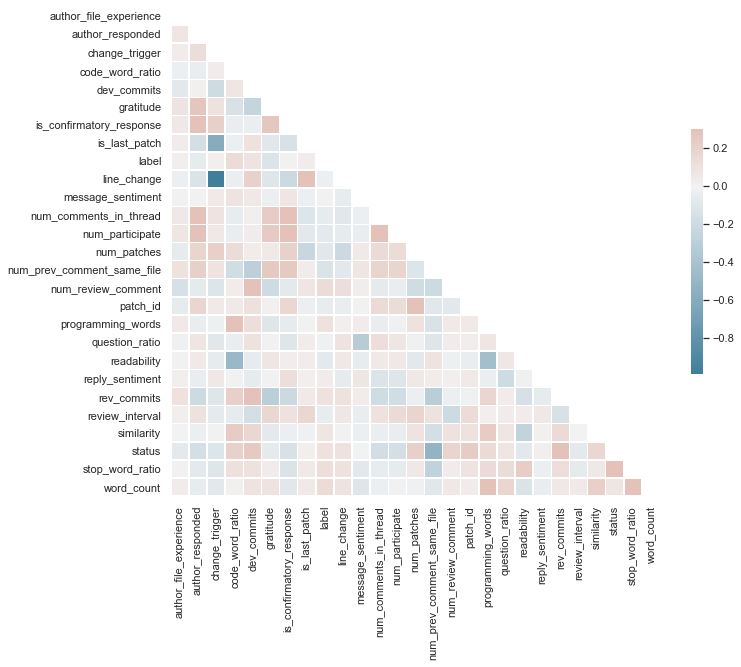

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset

# Compute the correlation matrix
corr = data.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


### High correlation (>0.9) visualization

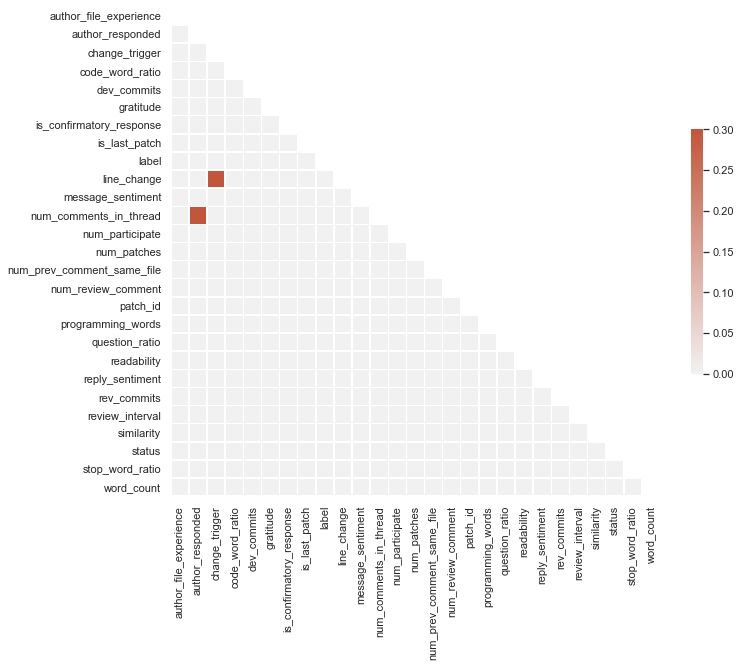

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset

# Compute the correlation matrix
corr2 = data.corr(method='pearson').abs() > 0.9

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr2, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr2, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [27]:
# Feature correlation with 'label'
corr['label']

author_file_experience        0.022155
author_responded             -0.058850
change_trigger                0.021543
code_word_ratio               0.133075
dev_commits                   0.085166
gratitude                    -0.122149
is_confirmatory_response     -0.002608
is_last_patch                 0.037290
label                         1.000000
line_change                  -0.024712
message_sentiment             0.003679
num_comments_in_thread       -0.056223
num_participate              -0.071899
num_patches                  -0.091870
num_prev_comment_same_file   -0.130723
num_review_comment            0.133936
patch_id                     -0.051528
programming_words             0.099793
question_ratio               -0.009094
readability                  -0.072542
reply_sentiment               0.029072
rev_commits                   0.102023
review_interval              -0.049748
similarity                    0.073622
status                        0.102756
stop_word_ratio          

### Remove Highly correlated features
For two features highly (>0.9) correlated with each others, keep the one with highest correlation with 'label' and remove the others

In [28]:
rejected_feature_list = []
key_list = list(data.keys())
for i in range(len(key_list)):
    key1 = key_list[i]
    for key2 in key_list[i+1:]:
        if abs(corr[key1][key2]) > 0.9:
            key1_score = corr['label'][key1]
            key2_score = corr['label'][key2]
            if abs(key1_score) >= abs(key2_score):
                print(key2, " = ", key2_score, " removed,", key1, " = ", key1_score, " selected.")
                rejected_feature_list.append(key2)
            else:
                print(key1, " = ", key1_score, " removed,", key2, " = ", key2_score, " selected.")
                rejected_feature_list.append(key1)

rejected_feature_list = list(set(rejected_feature_list))
rejected_feature_list

num_comments_in_thread  =  -0.05622343268051367  removed, author_responded  =  -0.05884961325801251  selected.
change_trigger  =  0.02154305885740504  removed, line_change  =  -0.024712063606343107  selected.


['change_trigger', 'num_comments_in_thread']

## Higly correlated feature clusters (highest correlation with label in bold)

1. **line_change**, change_trigger
1. num_comments_in_thread, **author_responded**

In [29]:
data.keys()

Index(['author_file_experience', 'author_responded', 'change_trigger',
       'code_word_ratio', 'dev_commits', 'gratitude',
       'is_confirmatory_response', 'is_last_patch', 'label', 'line_change',
       'message_sentiment', 'num_comments_in_thread', 'num_participate',
       'num_patches', 'num_prev_comment_same_file', 'num_review_comment',
       'patch_id', 'programming_words', 'question_ratio', 'readability',
       'reply_sentiment', 'rev_commits', 'review_interval', 'similarity',
       'status', 'stop_word_ratio', 'word_count'],
      dtype='object')

In [30]:
correlation_eliminated_features = list(set(list(data.keys())) - set(rejected_feature_list + ['label']))
correlation_eliminated_features.sort()
correlation_eliminated_features, len(correlation_eliminated_features)

(['author_file_experience',
  'author_responded',
  'code_word_ratio',
  'dev_commits',
  'gratitude',
  'is_confirmatory_response',
  'is_last_patch',
  'line_change',
  'message_sentiment',
  'num_participate',
  'num_patches',
  'num_prev_comment_same_file',
  'num_review_comment',
  'patch_id',
  'programming_words',
  'question_ratio',
  'readability',
  'reply_sentiment',
  'rev_commits',
  'review_interval',
  'similarity',
  'status',
  'stop_word_ratio',
  'word_count'],
 24)

## Discretization

In [31]:
# Discretizing neumeric features
discretize_pd(data, data, 'rev_commits', 2, False)
discretize_pd(data, data, 'dev_commits', 2, False)
#discretize_pd(data, data, 'num_review_comment', 2, False)
discretize_pd(data, data, 'readability', 2, False)
#discretize_pd(data, data, 'word_count', 2, False)
discretize_pd(data, data, 'review_interval', 2, False)
discretize_pd(data, data, 'stop_word_ratio', 2, False)
discretize_pd(data, data, 'author_file_experience', 2, False)

# Cannot be discretized with k-beans
data['code_word_ratio'] = (data['code_word_ratio'] > 0)*1 
data['question_ratio'] = (data['question_ratio']!= 0)*1 
data['similarity'] = (data['similarity']!= 0)*1  
#data['programming_words'] = (data['programming_words'] != 0)*1

In [32]:
### SAVE AND LOAD ALREADY PROCESSED DATA IF NECESSARY

data.to_csv('data/neat_data_processed.csv', index=False) # Dump processed data
# data = pd.read_csv('data/neat_data_processed.csv') # Load processed data

# Classification

In [33]:
from __future__ import print_function
import numpy as np
import pandas as pd
from sklearn import  tree
import  pydotplus

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import  precision_score
from sklearn.metrics import  f1_score
from statistics import mean
import random

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import  LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE, RandomOverSampler

import warnings
warnings.filterwarnings("ignore")

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [48]:
dt = tree.DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100 )
svm = LinearSVC()
nn  = MLPClassifier(alpha=1e-3, hidden_layer_sizes=(500,5), random_state=1)
xgb = XGBClassifier()
log = LogisticRegression()
#lin = LinearRegression()

clfs = [dt, rf, svm, nn, xgb, log]
clf_names = ['\\textbf{Decision Tree}', '\\textbf{Random Forest}', '\\textbf{SVM}', 
             '\\textbf{Neural Network}', '\\textbf{XGBoost}', '\\textbf{Logistic Regression}']

## Recursive Feature Elimination by Cross Validation (RFECV)

In [35]:
rfecv = RFECV(estimator=rf, step=1, cv=StratifiedKFold(10), scoring='f1_macro')
rfecv.fit(data[correlation_eliminated_features], data[['label']])

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                       criterion='gini', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='f1_macro', step=1,
      verbose=0)

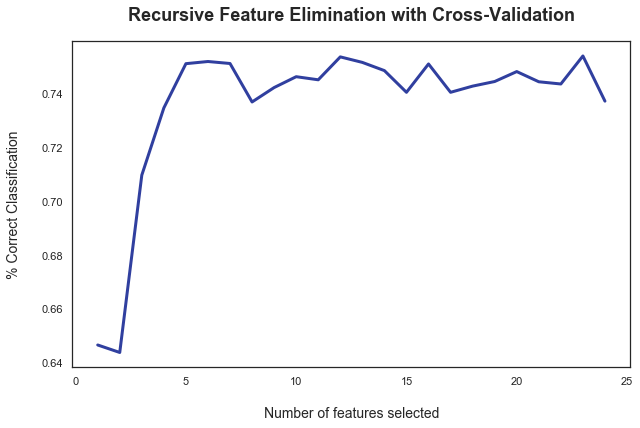

In [36]:
plt.figure(figsize=(10, 6))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [38]:
## Number of features selected
rfecv.n_features_

23

In [39]:
selected_features = []
for i in range(len(correlation_eliminated_features)):
    print(correlation_eliminated_features[i],"\t",rfecv.support_[i],"\t",rfecv.ranking_[i])
    if rfecv.support_[i]==True:
        selected_features += [correlation_eliminated_features[i]]

author_file_experience 	 True 	 1
author_responded 	 True 	 1
code_word_ratio 	 True 	 1
dev_commits 	 True 	 1
gratitude 	 True 	 1
is_confirmatory_response 	 True 	 1
is_last_patch 	 True 	 1
line_change 	 True 	 1
message_sentiment 	 True 	 1
num_participate 	 True 	 1
num_patches 	 True 	 1
num_prev_comment_same_file 	 True 	 1
num_review_comment 	 True 	 1
patch_id 	 True 	 1
programming_words 	 True 	 1
question_ratio 	 True 	 1
readability 	 True 	 1
reply_sentiment 	 False 	 2
rev_commits 	 True 	 1
review_interval 	 True 	 1
similarity 	 True 	 1
status 	 True 	 1
stop_word_ratio 	 True 	 1
word_count 	 True 	 1


In [40]:
selected_features

['author_file_experience',
 'author_responded',
 'code_word_ratio',
 'dev_commits',
 'gratitude',
 'is_confirmatory_response',
 'is_last_patch',
 'line_change',
 'message_sentiment',
 'num_participate',
 'num_patches',
 'num_prev_comment_same_file',
 'num_review_comment',
 'patch_id',
 'programming_words',
 'question_ratio',
 'readability',
 'rev_commits',
 'review_interval',
 'similarity',
 'status',
 'stop_word_ratio',
 'word_count']

## Machine Learning Classifier

In [41]:
def normalize_df(df):
    df_norm = (df - df.mean()) / (df.max() - df.min())
    return df_norm

def row_norm(df):
    norm = df/np.sqrt(np.square(df).sum(axis=1))
    return norm

def standardize_df(df):
    a = 1
    df_norm = (df - df.mean(axis=a)) / df.std(axis=a)
    return df_norm

def benchmark_classifier(clf, X_train, Y_train, X_test, Y_test):
    clf.fit(X_train, Y_train)
    pred = clf.predict(X_test)
    
    precision=precision_score(Y_test,pred, pos_label=1) #average="micro")
    recall = recall_score(Y_test, pred, pos_label=1) #average="micro")
    f1score = f1_score(Y_test, pred, pos_label=1) #average="micro")
    minority_recall = recall_score(Y_test, pred, pos_label=0)
    minority_precision = precision_score(Y_test, pred, pos_label=0)
    minority_f1 = f1_score(Y_test, pred, pos_label=0)
    accuracy=accuracy_score(Y_test, pred)

    return (precision,recall,f1score,accuracy,minority_f1,minority_recall, minority_precision)

In [42]:
def run_classifier(clf, df, iteration, resample, normalize):
    
    if normalize:
        df = normalize_df(df)

    Precision=[]
    Recall=[]
    Fmean=[]
    Accuracy=[]
    Minority_recall = []
    Minority_precision = []
    Minority_F1 = []

    random.seed(datetime.datetime.now())
    sampling_model = SMOTE(random_state=None, k_neighbors=15, sampling_strategy=0.65,  n_jobs=4)

    for k in range (0,iteration):
        kf = KFold(n_splits=10, shuffle=True)

        run_precision=[]
        run_recall=[]
        run_f1score=[]
        run_accuracy=[]
        run_minority_recall=[]
        run_minority_f1 = []
        run_minority_precision=[]

        X_np=np.array(df)
        Y_np=np.array(Y)

        for train, test in kf.split(df,Y):
            if resample:
                X_resampled, Y_resampled = sampling_model.fit_sample(X_np[train], Y_np[train])
            else:
                X_resampled, Y_resampled = X_np[train], Y_np[train]
            #print(np.bincount(Y_resampled))
            (precision,recall,f1score,accuracy,minority_f1,minority_recall,minority_precision)=benchmark_classifier(clf,X_resampled,Y_resampled,X_np[test],Y_np[test])

            run_accuracy.append(accuracy)
            run_f1score.append(f1score)
            run_precision.append(precision)
            run_recall.append(recall)
            run_minority_recall.append(minority_recall)
            run_minority_f1.append(minority_f1)
            run_minority_precision.append(minority_precision)

        Precision.append(mean(run_precision))
        Recall.append(mean(run_recall))
        Fmean.append(mean(run_f1score))
        Accuracy.append(mean(run_accuracy))
        Minority_recall.append(mean(run_minority_recall))
        Minority_precision.append(mean(run_minority_precision))
        Minority_F1.append(mean(run_minority_f1))

    print('{:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} \\\ \hline'.format(round(mean(Accuracy)*100, 2), round(mean(Precision)*100, 2), round(mean(Recall)*100, 2), round(mean(Fmean)*100, 2), round(mean(Minority_precision)*100, 2), round(mean(Minority_recall)*100, 2), round(mean(Minority_F1)*100, 2)))

    return mean(Precision), mean(Recall), mean(Fmean), mean(Accuracy),mean(Minority_F1), mean(Minority_precision), mean(Minority_recall)

In [51]:
X = data[selected_features]
Y = data[['label']]

# RUNNING ALL CLASSIFIERS ONE BY ONE
print("\t\t\t\t\t\t  Acc  | Useful                | Not Useful")
print("\t\t\t\t\t\t  A    | P,      R,      F1    | P,      R,      F1")
for (clf, name) in zip(clfs, clf_names):
    print("%29s"%name, " & ", end="")
    run_classifier(clf, X, iteration=20, resample=True, normalize=False)

		                  Acc  | Useful                | Not Useful
		                  A    | P,      R,      F1    | P,      R,      F1
       \textbf{Decision Tree}  & 81.25 & 91.13 & 85.16 & 87.99 & 50.44 & 64.49 & 56.23 \\ \hline
       \textbf{Random Forest}  & 87.20 & 90.87 & 93.63 & 92.20 & 68.69 & 59.74 & 63.44 \\ \hline
                 \textbf{SVM}  & 63.60 & 85.80 & 67.24 & 71.68 & 29.36 & 48.41 & 30.92 \\ \hline
      \textbf{Neural Network}  & 82.56 & 88.68 & 89.98 & 89.29 & 54.35 & 50.70 & 51.94 \\ \hline
             \textbf{XGBoost}  & 84.69 & 90.09 & 91.17 & 90.59 & 60.44 & 57.07 & 58.17 \\ \hline
 \textbf{Logistic Regression}  & 73.84 & 87.09 & 79.57 & 83.09 & 35.98 & 49.46 & 41.25 \\ \hline


## Results
                                     Acc   | Useful                | Not Useful
                                     A     | P,      R,      F1    | P,      R,      F1
           \textbf{Decision Tree}  & 81.25 & 91.13 & 85.16 & 87.99 & 50.44 & 64.49 & 56.23 \\ \hline
           \textbf{Random Forest}  & 87.20 & 90.87 & 93.63 & 92.20 & 68.69 & 59.74 & 63.44 \\ \hline
                     \textbf{SVM}  & 63.60 & 85.80 & 67.24 & 71.68 & 29.36 & 48.41 & 30.92 \\ \hline
          \textbf{Neural Network}  & 82.56 & 88.68 & 89.98 & 89.29 & 54.35 & 50.70 & 51.94 \\ \hline
                 \textbf{XGBoost}  & 84.69 & 90.09 & 91.17 & 90.59 & 60.44 & 57.07 & 58.17 \\ \hline
     \textbf{Logistic Regression}  & 73.84 & 87.09 & 79.57 & 83.09 & 35.98 & 49.46 & 41.25 \\ \hline

# Bosu et al.

In [52]:
feature_bosu_etal = [
    'change_trigger', 
    'is_confirmatory_response', 
    'patch_id',
    'num_participate',
    'num_comments_in_thread',
    'word_count',
    'author_responded',
    'message_sentiment'
]

In [53]:
print("Bosu et al.")
print("\t\t         Acc  | Useful                | Not Useful")
print("\t\t         A    | P,      R,      F1    | P,      R,      F1")
print("dtree:\t ", end="")
run_classifier(dt, data[feature_bosu_etal], iteration=20, resample=True, normalize=False)

Bosu et al.
		         Acc  | Useful                | Not Useful
		         A    | P,      R,      F1    | P,      R,      F1
dtree:	 75.27 & 88.76 & 79.59 & 83.87 & 39.39 & 56.78 & 46.17 \\ \hline


(0.8876263327885716,
 0.7958739501051525,
 0.8386805992573756,
 0.752723525803236,
 0.46172110814624145,
 0.3939038373424433,
 0.5678476150899983)

## Bosu et al. results
             Acc   | Useful                   | Not Useful
             A     | P,       R,       F1     | P,      R,        F1
    dtree:   75.27 & 88.76 & 79.59 & 83.87 & 39.39 & 56.78 & 46.17 \\ \hline

# Rahman et al.

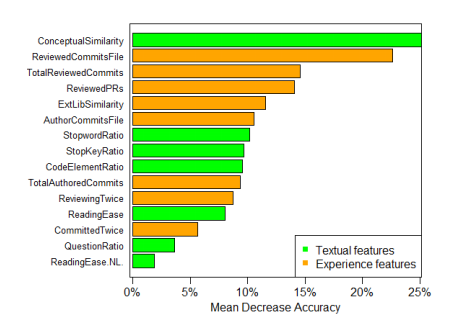

Rahman et al. features

In [54]:
# Binary
data['ReviewingTwice'] = df['ReviewingTwice']
data['CommittedTwice'] = (df['author_file_experience'] > 0)*1

# Numeric
data['ReviewedCommitsFile'] = df['ReviewedCommitsFile']
data['ReviewedPRs'] = df['ReviewedPRs']

Discretizing Rahman et al. neumeric features

In [55]:
discretize_pd(data, data, 'ReviewedCommitsFile', 2, False)
discretize_pd(data, data, 'ReviewedPRs', 2, False)

In [56]:
feature_rahman_etal = [
'similarity', 'ReviewedCommitsFile', 'dev_commits', 'num_review_comment', 'ReviewedPRs', 
'author_file_experience', 'stop_word_ratio', 'code_word_ratio',
'ReviewingTwice', 'readability', 'CommittedTwice', 'question_ratio'
]

# TotalAuthoredCommits = dev_commits
# TotalReviewedCommits = num_review_comment
# AuthorCommitsFile = author_file_experience

# Features not done:  
# 1. Ext library: do not have
# 2. key word ratio: not clearly described in the paper
# 3. ReadingEaseNL: not clear how it is different from ReadingEase

In [57]:
print("Rahman et al.")
print("\t         Acc  | Useful                | Not Useful")
print("\t         A    | P,      R,      F1    | P,      R,      F1")
print("Random Forest & ", end="")
run_classifier(rf, data[feature_rahman_etal], iteration=20, resample=True, normalize=False)

Rahman et al.
	         Acc  | Useful                | Not Useful
	         A    | P,      R,      F1    | P,      R,      F1
Random Forest & 79.32 & 88.67 & 85.42 & 86.97 & 46.08 & 53.37 & 49.05 \\ \hline


(0.8867119366971628,
 0.8541559830813201,
 0.8696549457757371,
 0.7932363315696649,
 0.4904989141139503,
 0.4607838475194565,
 0.5336689670250959)

## Rahman et al. Results
                     Acc  | Useful                | Not Useful
                     A    | P,      R,      F1    | P,      R,      F1
    Random Forest & 79.32 & 88.67 & 85.42 & 86.97 & 46.08 & 53.37 & 49.05 \\ \hline